In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2
import json
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


print("Hello world.")

2025-12-18 11:29:23.428501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766057363.649553      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766057363.713799      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766057364.243914      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766057364.243956      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766057364.243959      55 computation_placer.cc:177] computation placer alr

Hello world.


In [2]:
import os
import json
import numpy as np
import cv2
import random
import pandas as pd

def create_mask(json_file, image_shape):
    if json_file is None or not os.path.exists(json_file):
        return None
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
    except:
        return None
    if 'shapes' not in data or data['shapes'] is None:
        return None

    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    try:
        for shape in data['shapes']:
            points = np.array(shape.get('points', []), dtype=np.int32)
            if len(points) > 2:
                cv2.fillPoly(mask, [points], 255)
    except:
        return None

    return mask


def find_image_file(base_name, image_path):
    """Find the correct image file (.jpg, .JPG, .jpeg, .JPEG, .png)"""
    exts = [".jpg", ".JPG", ".jpeg", ".JPEG", ".png"]
    for ext in exts:
        file_path = os.path.join(image_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None

print("Hello world")

Hello world


In [3]:
train_images, valid_images, test_images  = [], [], []
train_masks, valid_masks, test_masks = [], [] , []
test_images_a, test_images_b, test_images_d = [], [], []
test_masks_a, test_masks_b, test_masks_d = [], [], []

image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Anthracnose(102)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Anthracnose(102)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/anthracnose_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Anthracnose ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)



print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

80 80
10 10
12 12


In [4]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Bacterial-Spot(752)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/bacterial_spot_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Bacterial-Spot ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

680 680
85 85
89 89


In [5]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset_Original_Data/Malabar_Dataset/Downy-Mildew(240)"
json_path = "/kaggle/input/annotated-dataset-json-files-version-2/annotated_json_files/Downy-Mildew(240)/affected_region"
split_file = pd.read_csv("/kaggle/input/malabar-dataset/downy_mildew_split.csv")


for i in range(0, len(split_file)):
    used_for = split_file.iloc[i]["used_for"]
    image_no = split_file.iloc[i]["image_no"]
    base_name = f"Downy-Mildew ({image_no})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if used_for == "training":
        train_images.append(image)
        train_masks.append(mask)
    elif used_for == "validation":
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)


#Bacterial-Spot (1).jpg

print(len(train_images), len(train_masks))
print(len(valid_images), len(valid_masks))
print(len(test_images), len(test_masks))

872 872
109 109
113 113


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# -----------------------------------------
# Convolution Block
# -----------------------------------------
def conv_block(x, filters, kernel_size=3):
    x = layers.Conv2D(filters, kernel_size, padding="same",
                      kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

# -----------------------------------------
# Encoder Block
# -----------------------------------------
def encoder_block(x, filters, n_convs):
    for _ in range(n_convs):
        x = conv_block(x, filters)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    return x

# -----------------------------------------
# Decoder Block
# -----------------------------------------
def decoder_block(x, filters, n_convs):
    x = layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(x)
    for _ in range(n_convs):
        x = conv_block(x, filters)
    return x

# -----------------------------------------
# SegNet Model
# -----------------------------------------
def build_segnet(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = encoder_block(inputs, 64, 2)
    x = encoder_block(x, 128, 2)
    x = encoder_block(x, 256, 3)
    x = encoder_block(x, 512, 3)
    x = encoder_block(x, 512, 3)

    # Decoder
    x = decoder_block(x, 512, 3)
    x = decoder_block(x, 512, 3)
    x = decoder_block(x, 256, 3)
    x = decoder_block(x, 128, 2)
    x = decoder_block(x, 64, 2)

    # Output Layer
    if num_classes == 1:
        outputs = layers.Conv2D(1, 1, activation="sigmoid")(x)
    else:
        outputs = layers.Conv2D(num_classes, 1, activation="softmax")(x)

    model = models.Model(inputs, outputs, name="SegNet")
    return model

# -----------------------------------------
# Build Model
# -----------------------------------------
model = build_segnet(input_shape=(256, 256, 3), num_classes=1)
model.summary()


I0000 00:00:1766057409.217839      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766057409.221754      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "SegNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 256)    │       590,08

 Total params: 31,820,801 (121.39 MB)

 Trainable params: 31,803,905 (121.32 MB)

 Non-trainable params: 16,896 (66.00 KB)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Preprocess images and masks
image_size = (256, 256)

def preprocess_data(images, masks):
    images_resized = [cv2.resize(img, image_size) for img in images]
    masks_resized = [cv2.resize(mask, image_size) for mask in masks]
    
    images_array = np.array(images_resized) / 255.0
    masks_array = np.array(masks_resized) / 255.0
    
    images_array = images_array.astype(np.float32)
    masks_array = masks_array.astype(np.float32)
    
    masks_array = np.expand_dims(masks_array, axis=-1)  # Ensure correct shape
    
    return images_array, masks_array

# Prepare datasets
X_train, y_train = preprocess_data(train_images, train_masks)
X_valid, y_valid = preprocess_data(valid_images, valid_masks)
X_test, y_test = preprocess_data(test_images, test_masks)
#X_test_a, y_test_a = preprocess_data(test_images_a, test_masks_a)
#X_test_b, y_test_b = preprocess_data(test_images_b, test_masks_b)

# Callbacks
checkpoint = ModelCheckpoint("Segnet_semi_final_best_model.keras", monitor="val_accuracy", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=40, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs= 100,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100


I0000 00:00:1766057428.233879     124 service.cc:152] XLA service 0x78448001c950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766057428.233932     124 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766057428.233939     124 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766057430.873107     124 cuda_dnn.cc:529] Loaded cuDNN version 91002
2025-12-18 11:30:44.610797: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 11:30:44.960824: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng4{k11=1} for conv %cudnn-conv-bw-input.27 = (f32[8,128,128,128]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,128,128,128]{3,2,1,0} %bitcast.33367, f32[128,128,3,3]{3,2,1,0} %bitcas

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.9099 - loss: 0.3522

2025-12-18 11:32:22.707675: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 11:32:22.934886: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 11:32:23.976129: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 11:32:24.283540: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.



Epoch 1: val_accuracy improved from -inf to 0.99214, saving model to Segnet_semi_final_best_model.keras
109/109 ━━━━━━━━━━━━━━━━━━━━ 137s 767ms/step - accuracy: 0.9104 - loss: 0.3510 - val_accuracy: 0.9921 - val_loss: 0.2643
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.9923 - loss: 0.1094
Epoch 2: val_accuracy did not improve from 0.99214
109/109 ━━━━━━━━━━━━━━━━━━━━ 72s 658ms/step - accuracy: 0.9923 - loss: 0.1094 - val_accuracy: 0.9921 - val_loss: 0.1333
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.9924 - loss: 0.0929
Epoch 3: val_accuracy did not improve from 0.99214
109/109 ━━━━━━━━━━━━━━━━━━━━ 71s 656ms/step - accuracy: 0.9924 - loss: 0.0929 - val_accuracy: 0.9921 - val_loss: 0.0970
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9923 - loss: 0.0799
Epoch 4: val_accuracy did not improve from 0.99214
109/109 ━━━━━━━━━━━━━━━━━━━━ 71s 655ms/step - accuracy: 0.9923 - loss: 0.0799 - val_accuracy: 0.9921 - val_loss: 0

2025-12-18 13:31:38.922811: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 13:31:39.161289: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 13:31:41.107133: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-18 13:31:41.427931: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step - accuracy: 0.9931 - loss: 0.0364 
Test Loss: 0.0319, Test Accuracy: 0.9939


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  


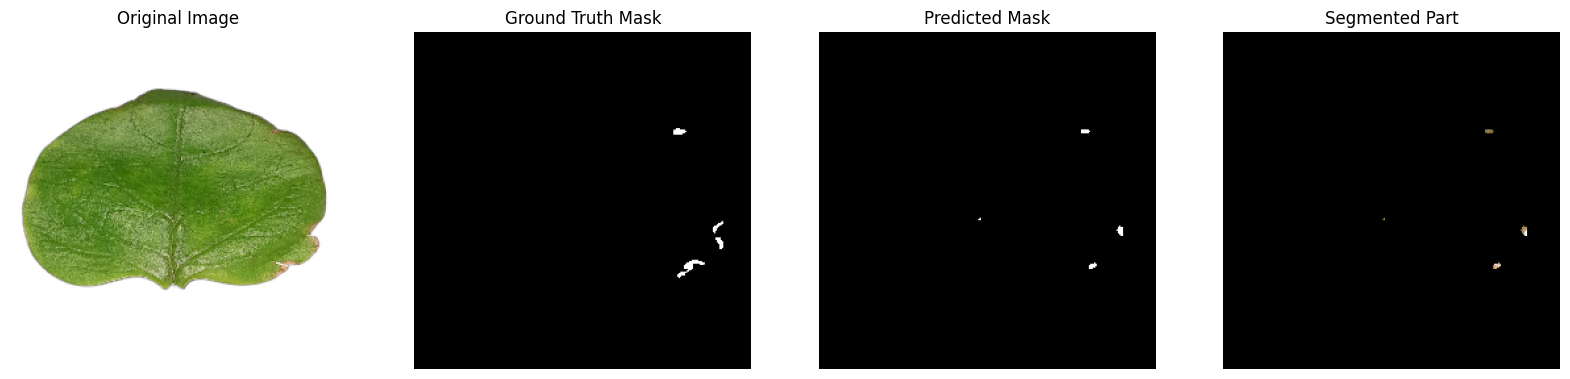

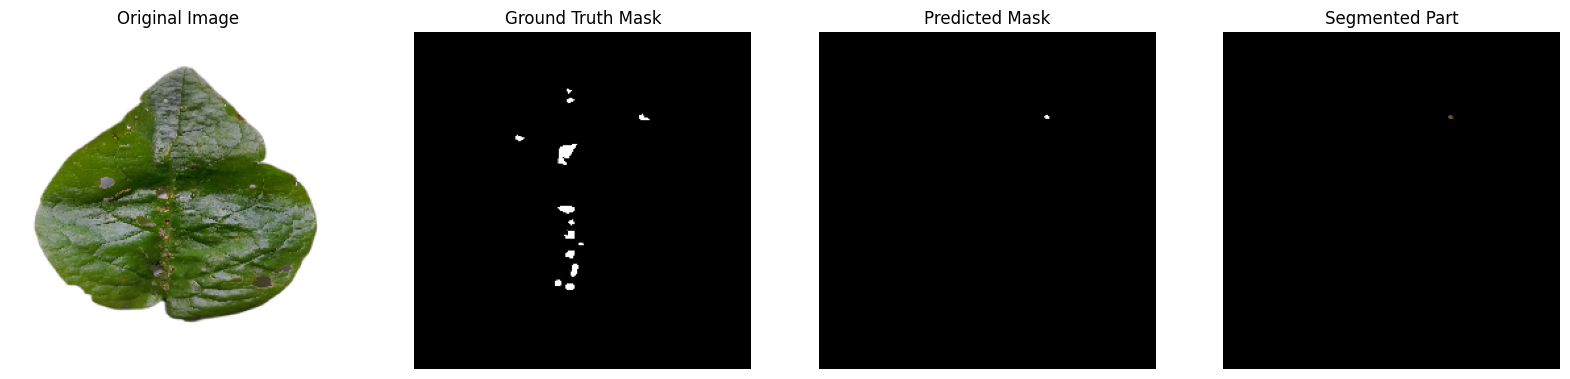

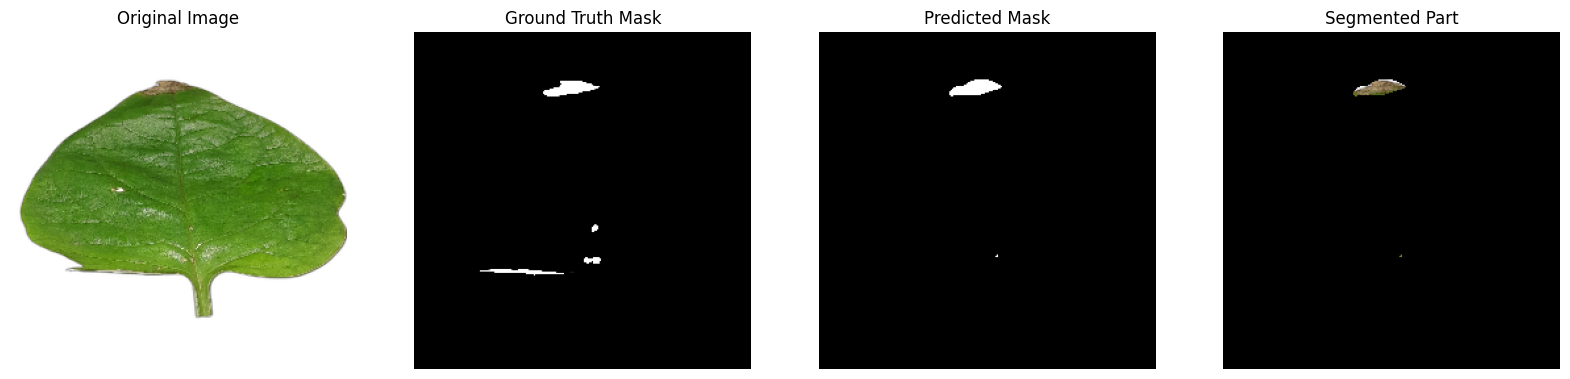

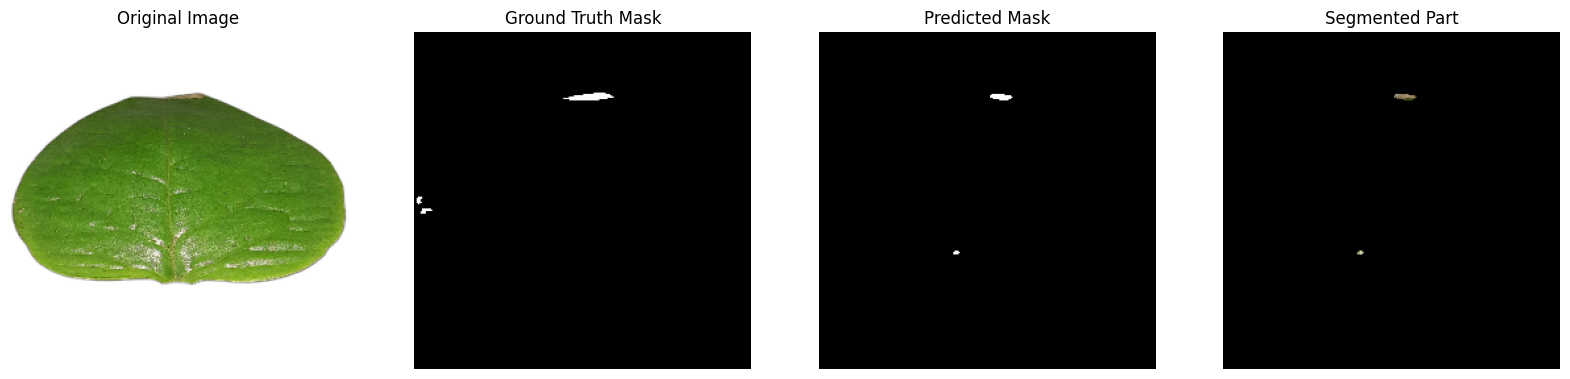

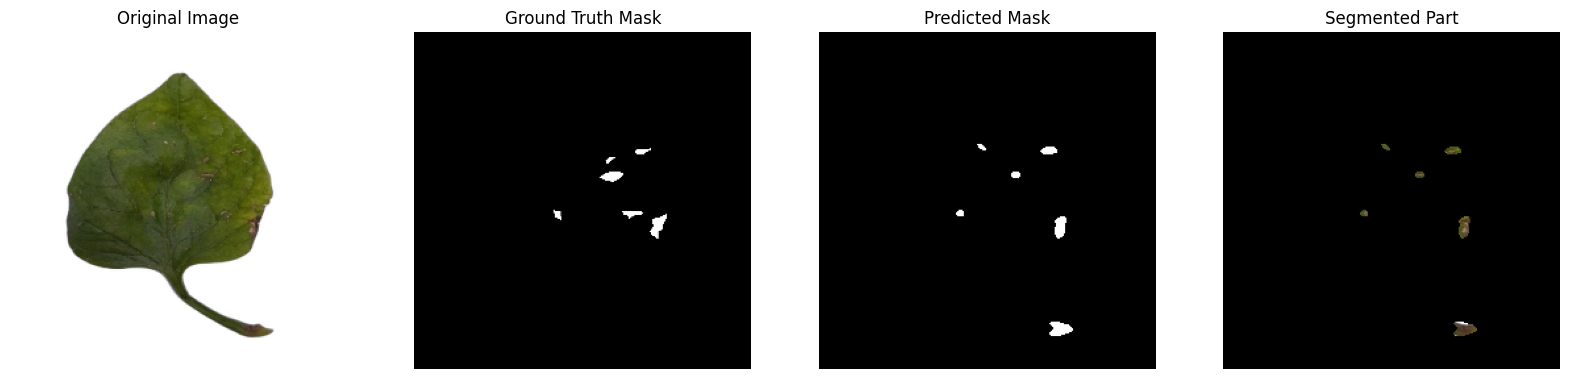

In [9]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# Prediction and Mask Creation
def create_mask(predictions):
    # Convert predictions to binary mask
    predictions = (predictions > 0.5).astype(np.uint8)
    return predictions

# Load model and predict
best_model = load_model("/kaggle/working/Segnet_semi_final_best_model.keras")
predictions = best_model.predict(X_test)

# Create masks from predictions
predicted_masks = create_mask(predictions)

def get_segmented_image(image, mask):
    # Ensure both are uint8 and mask is single channel
    image_uint8 = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image
    mask_uint8 = (mask.squeeze() * 255).astype(np.uint8)
    
    # Ensure mask is 2D
    if mask_uint8.ndim == 3:
        mask_uint8 = mask_uint8[..., 0]

    # Apply mask using bitwise_and
    segmented = cv2.bitwise_and(image_uint8, image_uint8, mask=mask_uint8)
    return segmented

def visualize_results(images, masks, predictions, num_images=10):
    for i in range(0, num_images):
        img = images[i]
        true_mask = masks[i]
        predicted_mask = predictions[i]
        segmented_img = get_segmented_image(img, predicted_mask)

        plt.figure(figsize=(20, 5))  # wider figure for 4 plots

        # 1. Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # 2. Ground Truth Mask
        plt.subplot(1, 4, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # 3. Predicted Mask
        plt.subplot(1, 4, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        # 4. Segmented Part
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Part')
        plt.axis('off')

        plt.show()

# Visualize results
visualize_results(X_test, y_test, predicted_masks, num_images=5)

In [ ]:
while(True):
    a = 5